# Imporitng Modules

In [1]:

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


2024-12-05 10:38:13.424259: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 10:38:13.517764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733377093.556894    4429 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733377093.567655    4429 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 10:38:13.654594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Load or download data and make possibilies with data (preprocess)

In [2]:
def load_and_preprocess_data():
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    # Normalize pixel values to be between 0 and 1
    x_train, x_test = x_train / 255.0, x_test / 255.0 # normalizing image by dividing it will max

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

    return (x_train, y_train), (x_test, y_test), datagen


In [3]:
(x_train, y_train), (x_test, y_test), datagen = load_and_preprocess_data()

In [4]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

(<matplotlib.image.AxesImage at 0x715a58b4a5a0>, array([6], dtype=uint8))

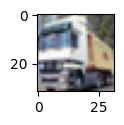

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[1]), y_train[0]

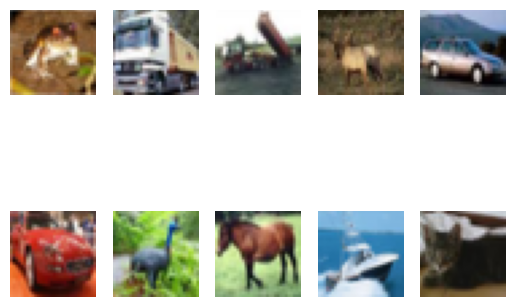

In [6]:
# how training data look like
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [7]:
# how output image look like
np.unique(y_train) # labels are values between 1 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Make a model

In [8]:
def cnn_model():

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    """
    Step 4: Compile the Model

    Compiles the model with the Adam optimizer and categorical cross-entropy loss
    function.
    """
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model


In [9]:
model = cnn_model()

/home/umair-ali/Desktop/phd deep learning after mid/codes to make operational and understand/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733377097.195168    4429 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6029 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#Train a Model

In [10]:

def train_model(model, x_train, y_train, x_test, y_test, datagen):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=20,
                        validation_data=(x_test, y_test))
    return history


In [11]:

history = train_model(model, x_train, y_train, x_test, y_test, datagen)
history

Epoch 1/20


/home/umair-ali/Desktop/phd deep learning after mid/codes to make operational and understand/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733377098.516659    5766 service.cc:148] XLA service 0x715870005190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733377098.518200    5766 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-05 10:38:18.539337: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733377098.629663    5766 cuda_dnn.

  27/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1147 - loss: 2.3037

I0000 00:00:1733377099.868694    5766 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2907 - loss: 1.8942 - val_accuracy: 0.4934 - val_loss: 1.4037
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4491 - loss: 1.5088 - val_accuracy: 0.5337 - val_loss: 1.3054
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5023 - loss: 1.3781 - val_accuracy: 0.5904 - val_loss: 1.1369
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5334 - loss: 1.2963 - val_accuracy: 0.5761 - val_loss: 1.2002
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5587 - loss: 1.2447 - val_accuracy: 0.6029 - val_loss: 1.1347
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5725 - loss: 1.2097 - val_accuracy: 0.6386 - val_loss: 1.0122
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5853 - loss: 1.1635 - val_accuracy: 0.6537 - val_loss: 0.9885
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6031 - loss: 1.1199 - val

In [12]:
## Now save model
import json

# Assuming 'history' is the object returned by model.fit()
with open('history.json', 'w') as f:
    json.dump(history.history, f)


# Test Model

In [13]:
def test_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    # Evaluate the model
    #test_loss, test_acc = Model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy: {test_acc}")


In [14]:
test_model(model, x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7202 - loss: 0.8108
Test accuracy: 0.7171000242233276


# Validate Model

In [15]:
x_test[:1].shape

(1, 32, 32, 3)

In [16]:
model.layers[:]

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [17]:
def visualize_layer_outputs(model, layer_index, x):
    # Get the outputs of all the layers
    layer_outputs = [layer.output for layer in model.layers[:layer_index+1]]

    # Create a model that maps the input to the activations of all layers up to layer_index
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the activations (outputs) for the input 'x'
    activations = activation_model.predict(x)

    # Get the activation of the layer at layer_index
    selected_layer_activation = activations[layer_index]

    # Plot the activation maps for each channel in the selected layer
    plt.figure(figsize=(15, 15))

    # Loop through each channel (feature map) and visualize
    num_channels = selected_layer_activation.shape[-1]  # Number of channels in the selected layer
    for i in range(num_channels):
        plt.subplot(8, 8, i + 1)
        plt.imshow(selected_layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()


In [18]:
# Make sure the model is built by running a dummy prediction
dummy_input = x_test[:1]  # Make sure this matches the input shape of your model
model.predict(dummy_input)  # This will build the model and define the input/output shapes

# Now visualize the layer activations
# visualize_layer_outputs(model, layer_index=4, x=dummy_input)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


array([[6.26576511e-05, 1.05538999e-03, 2.11941617e-04, 6.87988460e-01,
        2.79424159e-04, 2.93714345e-01, 2.65281112e-03, 2.81269866e-04,
        1.26525955e-02, 1.10115937e-03]], dtype=float32)

In [19]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


array([[6.3049280e-05, 1.0595920e-03, 2.1291315e-04, ..., 2.8237895e-04,
        1.2668771e-02, 1.1041828e-03],
       [4.3269731e-02, 1.3419086e-01, 9.0154339e-05, ..., 1.0618852e-05,
        8.1974757e-01, 2.6652331e-03],
       [9.0763956e-02, 1.6015092e-01, 4.7728098e-03, ..., 7.5185974e-03,
        4.9070448e-01, 2.2193612e-01],
       ...,
       [1.4413152e-05, 5.7981231e-07, 1.5865949e-03, ..., 1.7541396e-02,
        2.8262835e-05, 1.5173274e-05],
       [7.2685733e-02, 8.8768536e-01, 7.1425438e-03, ..., 5.5795354e-03,
        9.5022935e-04, 5.3175823e-03],
       [4.9671672e-07, 1.1838353e-08, 2.9366271e-05, ..., 9.9810153e-01,
        6.1838907e-09, 7.7728572e-07]], dtype=float32)